In [9]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import helpers
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score, learning_curve

from IPython.display import display

In [11]:
df = pd.read_csv('data/train.csv',index_col=0)
train = pd.read_csv('data/train_lab.csv',index_col = 0)
test = pd.read_csv('data/test_lab.csv',index_col = 0)
y = df['target']

In [12]:
categorical = list(df.select_dtypes('object').columns)
numerical = list(df.select_dtypes('float64').columns)

In [13]:
train

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18
id,,,,,,,,,,,,,,,,,,,,,
0,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,...,0.0,258.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0
1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,...,5.0,162.0,0.0,1.0,0.0,1.0,3.0,1.0,3.0,1.0
2,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,...,9.0,69.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,1.0
3,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,...,5.0,241.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0
4,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,...,0.0,75.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,0.681700,0.500730,0.662428,0.671927,0.390566,0.145840,0.262767,0.514248,0.519340,0.617436,...,0.0,159.0,0.0,0.0,0.0,1.0,3.0,1.0,3.0,1.0
499995,0.489226,0.790664,0.821657,0.620356,0.384891,0.735879,0.547731,0.726653,0.470575,0.275743,...,4.0,163.0,0.0,1.0,0.0,1.0,1.0,3.0,3.0,1.0
499996,0.487882,0.522347,0.407037,0.232436,0.832482,0.810663,0.596939,0.308821,0.373997,0.518024,...,0.0,156.0,1.0,0.0,0.0,1.0,3.0,1.0,3.0,3.0


### Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score

<module 'matplotlib.pyplot' from 'd:\\projects\\funwithkaggle\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

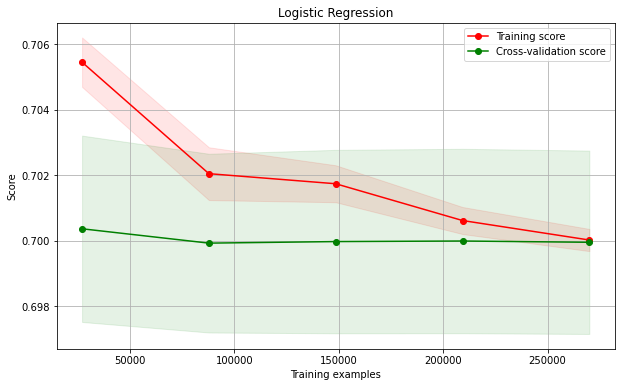

In [7]:
# Logistic Regression on numerical features
title = 'Logistic Regression'
helpers.plot_learning_curve(LogisticRegression(),title,train[numerical],
                            y,score='roc_auc',cv=10)

In [12]:
lr = LogisticRegression();
lr.fit(train[numerical],y);

In [13]:
logreg_preds=lr.predict_proba(test[numerical])[:,1]
logreg_preds = pd.DataFrame(logreg_preds,index=test.index)
logreg_preds.columns = ['target']
logreg_preds.to_csv('predictions/logreg.csv')

In [14]:
logregtrain = lr.predict_proba(train[numerical])[:,1]

In [16]:
roc_auc_score(y,logregtrain)

0.7000139395242171

<module 'matplotlib.pyplot' from 'd:\\projects\\funwithkaggle\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

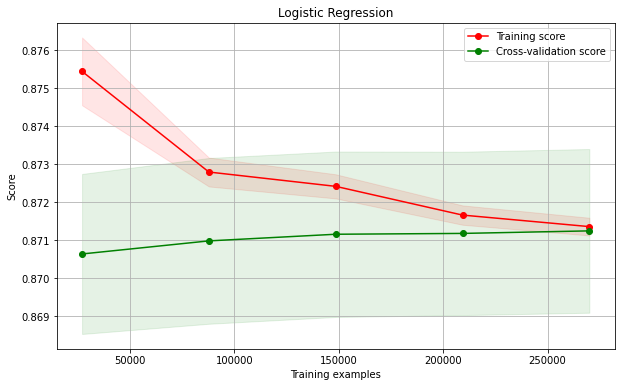

In [23]:
# logistic regression on scaled data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)
helpers.plot_learning_curve(LogisticRegression(),title,train_scaled,
                            y,score='roc_auc',cv=10)

In [14]:
lr2 = LogisticRegression()
lr2.fit(train_scaled,y);

In [15]:
lr2train = lr2.predict_proba(train_scaled)[:,1]
roc_auc_score(y,lr2train)

0.8713514719873385

In [16]:
logreg2_preds=LogisticRegression().fit(train_scaled,y).predict_proba(test_scaled)[:,1]
logreg2_preds = pd.DataFrame(logreg2_preds,index=test.index)
logreg2_preds.columns = ['target']
logreg2_preds.to_csv('predictions/logreg2.csv')

In [24]:
cross_val_score(LogisticRegression(),train_scaled,y, scoring='roc_auc')

array([0.87353827, 0.87099648, 0.87210945, 0.869659  , 0.86994722])

### XGBoost
#### Quick look

In [7]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [68]:
# get validation set for early stopping
X_train,X_val,y_train,y_val=train_test_split(train,y,train_size=0.75,
                                            random_state=42)

In [74]:
X_val

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat16_C,cat16_D,cat17_A,cat17_B,cat17_C,cat17_D,cat18_A,cat18_B,cat18_C,cat18_D
id,,,,,,,,,,,,,,,,,,,,,
8224,0.283649,0.342611,0.342671,0.560342,0.612346,0.735347,0.571919,0.349539,0.365583,0.346876,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
86264,0.135080,0.176353,0.214172,0.780538,0.233038,0.061876,0.108614,0.167053,0.276963,0.255904,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
192429,0.928881,0.775301,0.852616,0.842231,0.810073,0.554478,0.225124,0.932560,0.587645,0.772923,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
498901,0.931599,0.700799,0.855175,0.870768,0.671623,0.679097,0.228974,0.891719,0.617799,0.788595,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
289580,0.481380,0.128650,0.284130,0.265940,0.795067,0.262829,0.405174,0.358326,0.253632,0.258900,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250734,0.714991,0.299507,0.352614,0.324932,0.653446,0.620572,0.542991,0.416123,0.358137,0.302132,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
348021,0.664337,0.285753,0.319853,0.328967,0.253391,0.040067,0.311399,0.368962,0.371125,0.521754,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
140899,0.900506,0.722219,0.820001,0.711589,0.798226,0.486171,0.237802,0.903370,0.562726,0.813621,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [6]:
hyperparameters = {'n_estimators': 957,
  'max_depth': 12,
  'min_child_weight': 1,
  'reg_alpha': 2.727219609196151,
  'reg_lambda': 16.555705002072063,
  'gamma': 8.464501117728167e-06,
  'colsample_bytree': 0.2,
  'subsample': 0.8995564037488012,
  'learning_rate': 0.026877374619286222,
  'scale_pos_weight': 1.4706878130695131}

In [8]:
# fitting model
gbm = XGBClassifier(**hyperparameters,eval_metric='auc')
gbm.fit(train,y,verbose=False)

KeyboardInterrupt: 

In [11]:
# making and saving prediction
gbm_preds = pd.DataFrame(gbm.predict_proba(test)[:,1],index=test.index,
                        columns=['target'])
gbm_preds.to_csv('predictions/xgb.csv')

In [31]:
roc_auc_score(y_val,gbm.predict_proba(X_val)[:,1])

0.8921976897318946

#### Tuning with Optuna
There are many hyperparameters, which we will tune using [Optuna](https://github.com/optuna/optuna) and cross validation.

In [14]:
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [15]:
def kfold_score(X,y,k,params):
    kf = KFold(k)
    scores = []
    
    for i, (train_idx, val_idx) in enumerate(kf.split(X)):
        
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_val = X.iloc[val_idx]
        y_val = y.iloc[val_idx]
        
        model = XGBClassifier(**params,eval_metric= 'auc')
        model.fit(X_train,y_train,early_stopping_rounds=100,
                 eval_set = [(X_val,y_val)], verbose=100)
        
        yp_train = model.predict_proba(X_train)[:,1]
        yp_val = model.predict_proba(X_val)[:,1]
        
        train_score = roc_auc_score(y_train, yp_train)
        val_score = roc_auc_score(y_val,yp_val)

        
        scores.append((train_score,val_score))
        
    scores = pd.DataFrame(scores,columns=['train score', 'val score'])
        
    return scores

In [16]:
def kfold_prediction(X,y,X_test,k,params):
    preds = np.zeros(len(X_test))
    kf = KFold(k)
    
    for i, (train_idx, val_idx) in enumerate(kf.split(X)):
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_val = X.iloc[val_idx]
        y_val = y.iloc[val_idx]
        
        model = XGBClassifier(**params, eval_metric='auc')
        model.fit(X_train,y_train,early_stopping_rounds=100,
                 eval_set = [(X_val,y_val)], verbose=100)
        
        preds += model.predict_proba(X_test)[:,1]/k
        print(f"--Fold {i} done --")
        
    return preds

In [17]:
# objective function
def objective(trial):
    
    
    params = {
        "n_estimators": trial.suggest_int('n_estimators',100,1000),
        "max_depth": trial.suggest_int('max_depth',2,30),
        "min_child_weight": trial.suggest_int('min_child_weight',0,5),
        "reg_alpha": trial.suggest_float('reg_alpha',1e-8,20),
        "reg_lambda": trial.suggest_float('reg_lambda', 1e-8,20),
        "gamma": trial.suggest_loguniform('gamma',1e-8,1.0),
        'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree',
                                                           0.1, 1, 0.01),
        'subsample': trial.suggest_float('subsample',.5,1.0),
        'learning_rate': trial.suggest_float('learning_rate',0.02,0.06),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight',1.,5.)
    }
    
    scores = kfold_score(train,y,5,params);
    
    return scores['val score'].mean()

In [26]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, timeout=3600)

[I 2021-03-05 14:34:14,044] A new study created in memory with name: no-name-f9d49273-c37e-4d3c-bc35-0158aa560896


[0]	validation_0-auc:0.86009
[100]	validation_0-auc:0.88701
[200]	validation_0-auc:0.89162
[300]	validation_0-auc:0.89303
[400]	validation_0-auc:0.89329
[459]	validation_0-auc:0.89330
[0]	validation_0-auc:0.86033
[100]	validation_0-auc:0.88629
[200]	validation_0-auc:0.89089
[300]	validation_0-auc:0.89218
[400]	validation_0-auc:0.89241
[459]	validation_0-auc:0.89238
[0]	validation_0-auc:0.86060
[100]	validation_0-auc:0.88669
[200]	validation_0-auc:0.89142
[300]	validation_0-auc:0.89289
[400]	validation_0-auc:0.89326
[459]	validation_0-auc:0.89324
[0]	validation_0-auc:0.85718
[100]	validation_0-auc:0.88380
[200]	validation_0-auc:0.88821
[300]	validation_0-auc:0.88937
[400]	validation_0-auc:0.88972
[459]	validation_0-auc:0.88973
[0]	validation_0-auc:0.85767
[100]	validation_0-auc:0.88450
[200]	validation_0-auc:0.88927
[300]	validation_0-auc:0.89055
[400]	validation_0-auc:0.89090
[459]	validation_0-auc:0.89088


[I 2021-03-05 15:03:14,044] Trial 0 finished with value: 0.8919528946165889 and parameters: {'n_estimators': 460, 'max_depth': 29, 'min_child_weight': 0, 'reg_alpha': 10.43255333731853, 'reg_lambda': 14.619587286424224, 'gamma': 0.0032309965549829982, 'colsample_bytree': 0.93, 'subsample': 0.5457733920409555, 'learning_rate': 0.024466904185154556, 'scale_pos_weight': 4.295170682159543}. Best is trial 0 with value: 0.8919528946165889.


[0]	validation_0-auc:0.86392
[100]	validation_0-auc:0.88824
[170]	validation_0-auc:0.89142
[0]	validation_0-auc:0.86257
[100]	validation_0-auc:0.88747
[170]	validation_0-auc:0.89090
[0]	validation_0-auc:0.86399
[100]	validation_0-auc:0.88759
[170]	validation_0-auc:0.89097
[0]	validation_0-auc:0.86142
[100]	validation_0-auc:0.88541
[170]	validation_0-auc:0.88865
[0]	validation_0-auc:0.86047
[100]	validation_0-auc:0.88579
[170]	validation_0-auc:0.88930


[I 2021-03-05 15:06:22,345] Trial 1 finished with value: 0.8902490008050471 and parameters: {'n_estimators': 171, 'max_depth': 8, 'min_child_weight': 1, 'reg_alpha': 17.797983119581243, 'reg_lambda': 17.88501877285884, 'gamma': 0.005849056661177121, 'colsample_bytree': 0.84, 'subsample': 0.751418530223565, 'learning_rate': 0.047125527143638185, 'scale_pos_weight': 2.6782718976987407}. Best is trial 0 with value: 0.8919528946165889.


[0]	validation_0-auc:0.86625
[100]	validation_0-auc:0.89228
[200]	validation_0-auc:0.89404
[300]	validation_0-auc:0.89408
[326]	validation_0-auc:0.89394
[0]	validation_0-auc:0.86486
[100]	validation_0-auc:0.89166
[200]	validation_0-auc:0.89328
[300]	validation_0-auc:0.89315
[306]	validation_0-auc:0.89310
[0]	validation_0-auc:0.86631
[100]	validation_0-auc:0.89199
[200]	validation_0-auc:0.89369
[300]	validation_0-auc:0.89354
[338]	validation_0-auc:0.89336
[0]	validation_0-auc:0.86311
[100]	validation_0-auc:0.88927
[200]	validation_0-auc:0.89092
[300]	validation_0-auc:0.89095
[363]	validation_0-auc:0.89051
[0]	validation_0-auc:0.86457
[100]	validation_0-auc:0.88981
[200]	validation_0-auc:0.89140
[300]	validation_0-auc:0.89125
[312]	validation_0-auc:0.89122


[I 2021-03-05 15:18:06,956] Trial 2 finished with value: 0.8927620894997206 and parameters: {'n_estimators': 985, 'max_depth': 15, 'min_child_weight': 0, 'reg_alpha': 16.33687754364946, 'reg_lambda': 15.69704502341835, 'gamma': 0.00023756851291356875, 'colsample_bytree': 0.86, 'subsample': 0.8532807507491983, 'learning_rate': 0.05861536487393579, 'scale_pos_weight': 2.5031247179397904}. Best is trial 2 with value: 0.8927620894997206.


[0]	validation_0-auc:0.86546
[100]	validation_0-auc:0.89001
[200]	validation_0-auc:0.89286
[300]	validation_0-auc:0.89355
[400]	validation_0-auc:0.89363
[441]	validation_0-auc:0.89358
[0]	validation_0-auc:0.86426
[100]	validation_0-auc:0.88961
[200]	validation_0-auc:0.89277
[300]	validation_0-auc:0.89370
[400]	validation_0-auc:0.89386
[500]	validation_0-auc:0.89362
[509]	validation_0-auc:0.89356
[0]	validation_0-auc:0.86569
[100]	validation_0-auc:0.88997
[200]	validation_0-auc:0.89339
[300]	validation_0-auc:0.89415
[400]	validation_0-auc:0.89431
[500]	validation_0-auc:0.89392
[502]	validation_0-auc:0.89393
[0]	validation_0-auc:0.86280
[100]	validation_0-auc:0.88782
[200]	validation_0-auc:0.89081
[300]	validation_0-auc:0.89146
[400]	validation_0-auc:0.89150
[429]	validation_0-auc:0.89146
[0]	validation_0-auc:0.86280
[100]	validation_0-auc:0.88805
[200]	validation_0-auc:0.89137
[300]	validation_0-auc:0.89224
[400]	validation_0-auc:0.89247
[500]	validation_0-auc:0.89236
[529]	validation_0

[I 2021-03-05 15:28:51,850] Trial 3 finished with value: 0.8931965821833717 and parameters: {'n_estimators': 750, 'max_depth': 10, 'min_child_weight': 3, 'reg_alpha': 15.464966473476428, 'reg_lambda': 2.318024361394288, 'gamma': 5.926206099154642e-07, 'colsample_bytree': 0.88, 'subsample': 0.6764778291156515, 'learning_rate': 0.04641196717260916, 'scale_pos_weight': 3.856830383263087}. Best is trial 3 with value: 0.8931965821833717.


[0]	validation_0-auc:0.86628
[100]	validation_0-auc:0.89043
[200]	validation_0-auc:0.89253


KeyboardInterrupt: 

In [18]:
current = {'n_estimators': 957,
  'max_depth': 12,
  'min_child_weight': 2,
  'reg_alpha': 2.727219609196151,
  'reg_lambda': 16.555705002072063,
  'gamma': 8.464501117728167e-06,
  'colsample_bytree': 0.2,
  'subsample': 0.8995564037488012,
  'learning_rate': 0.03,
  'scale_pos_weight': 1.5}

In [19]:
kfold_score(train,y,5,current)

[0]	validation_0-auc:0.76333
[100]	validation_0-auc:0.89079
[200]	validation_0-auc:0.89425
[300]	validation_0-auc:0.89575
[400]	validation_0-auc:0.89629
[500]	validation_0-auc:0.89656
[600]	validation_0-auc:0.89668
[700]	validation_0-auc:0.89668
[714]	validation_0-auc:0.89667
[0]	validation_0-auc:0.76232
[100]	validation_0-auc:0.88953
[200]	validation_0-auc:0.89332
[300]	validation_0-auc:0.89491
[400]	validation_0-auc:0.89559


KeyboardInterrupt: 

In [20]:
preds = kfold_prediction(train,y,test,10,current)

[0]	validation_0-auc:0.76331
[100]	validation_0-auc:0.89193
[200]	validation_0-auc:0.89493
[300]	validation_0-auc:0.89625
[400]	validation_0-auc:0.89677
[500]	validation_0-auc:0.89699
[600]	validation_0-auc:0.89707
[700]	validation_0-auc:0.89706
[769]	validation_0-auc:0.89704
--Fold 0 done --
[0]	validation_0-auc:0.76464
[100]	validation_0-auc:0.89009
[200]	validation_0-auc:0.89371
[300]	validation_0-auc:0.89529
[400]	validation_0-auc:0.89584
[500]	validation_0-auc:0.89614
[600]	validation_0-auc:0.89623
[684]	validation_0-auc:0.89622
--Fold 1 done --
[0]	validation_0-auc:0.76242
[100]	validation_0-auc:0.89025
[200]	validation_0-auc:0.89382
[300]	validation_0-auc:0.89543
[400]	validation_0-auc:0.89613
[500]	validation_0-auc:0.89642
[600]	validation_0-auc:0.89654
[700]	validation_0-auc:0.89657
[800]	validation_0-auc:0.89663
[879]	validation_0-auc:0.89662
--Fold 2 done --
[0]	validation_0-auc:0.76132
[100]	validation_0-auc:0.88910
[200]	validation_0-auc:0.89278
[300]	validation_0-auc:0.89

In [21]:
# making and saving prediction
xgboptuna_preds = pd.DataFrame(preds,index=test.index,columns=['target'])
xgboptuna_preds.to_csv('predictions/xgb_label_optuna10fold.csv')

In [79]:
D=[]

In [81]:
D.append({'n_estimators': 471,
   'max_depth': 15,
   'min_child_weight': 3,
   'reg_alpha': 29.38402607791531,
   'reg_lambda': 0.2586344056733355,
   'gamma': 6.973517474605706e-06,
   'colsample_bytree': 0.35,
   'learning_rate': 0.04074410083182718,
   'scale_pos_weight': 4})

In [87]:
D

[{'n_estimators': 957,
  'max_depth': 12,
  'min_child_weight': 1,
  'reg_alpha': 2.727219609196151,
  'reg_lambda': 16.555705002072063,
  'gamma': 8.464501117728167e-06,
  'colsample_bytree': 0.2,
  'subsample': 0.8995564037488012,
  'learning_rate': 0.026877374619286222,
  'scale_pos_weight': 1.4706878130695131},
 {'n_estimators': 900,
  'max_depth': 15,
  'min_child_weight': 3,
  'reg_alpha': 29.38402607791531,
  'reg_lambda': 0.2586344056733355,
  'gamma': 6.973517474605706e-06,
  'colsample_bytree': 0.35,
  'learning_rate': 0.04074410083182718,
  'scale_pos_weight': 4}]